## Observations and Insights 

In [364]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


The following observations and conclusions can be drawn from this data analysis:

* There is an almost equal split between the male and female subjects in this study.

* There is a positive correlation between tumor volume and weight.

* Mice subject to the Ramicane and Capomuline Regimen have smaller tumor volumes than those subject to the Ceftamin and Infubinol Regimen.

* Over a span of 45 days, Capomulin subjects show a 44.4% decrease in tumor volume. 


In [365]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [366]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


#The data shown above contains no nulls and the data types are correct. No data cleaning issues on this dataframe.

In [367]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [368]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


#The data shown above contains no nulls and the data types are correct. No data cleaning issues on this dataframe.

In [369]:
# Combine the data into a single dataset
df1 = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the table for preview
df1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [370]:
df1 = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB
None


In [371]:
df1["Mouse ID"].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [372]:
df1["Mouse ID"].unique().size

249

In [373]:
df1["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [374]:
# Checking the number of mice.
print(f"Unique Mouse IDs: {df1['Mouse ID'].unique().size}")
print(f"Total Mouse IDs: {df1['Mouse ID'].size}")

Unique Mouse IDs: 249
Total Mouse IDs: 1893


In [375]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [376]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df1.loc[df1["Mouse ID"] != "g989"].reset_index(drop=True)
df2.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
a203      0            1
q610      5            1
q633      25           1
          20           1
          15           1
                      ..
i334      30           1
          25           1
          20           1
          15           1
z969      45           1
Length: 1880, dtype: int64

In [377]:
df2["Mouse ID"].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [378]:
df2["Mouse ID"].unique().size

248

## Summary Statistics

In [379]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
df_summary_table = pd.DataFrame()
df_summary_table['mean'] = df2.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
df_summary_table['median'] = df2.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
df_summary_table['var'] = df2.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
df_summary_table['std'] = df2.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
df_summary_table['sem'] = df2.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
df_summary_table




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [380]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [381]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

<AxesSubplot:title={'center':'Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen'>

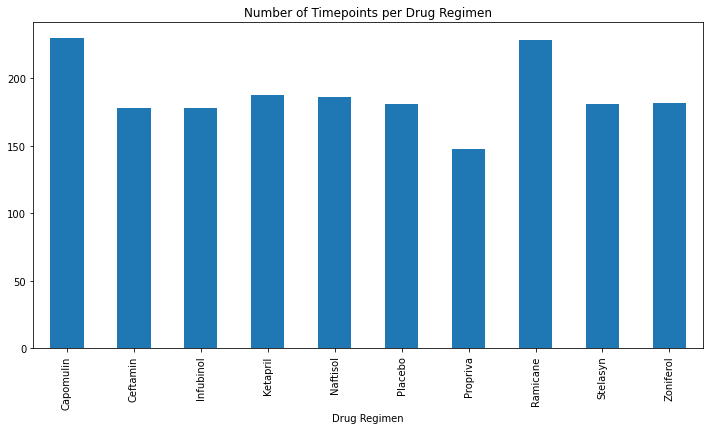

In [382]:
fig = plt.figure(figsize=(12,6))
df2.groupby('Drug Regimen')['Timepoint'].size().plot(kind='bar', title='Number of Timepoints per Drug Regimen')

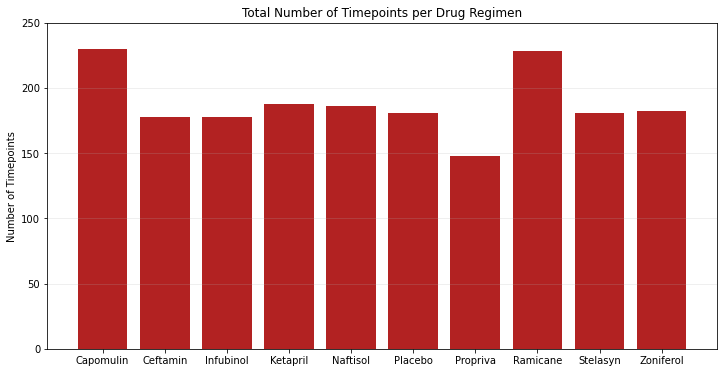

In [383]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# step 1, get the data
s1 = df2.groupby('Drug Regimen')['Timepoint'].size()
# step 2, init the plot
fig = plt.figure(figsize=(12,6))
plt.bar(s1.index, s1.values, color="firebrick")

# step 3, customization
plt.title("Total Number of Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.grid(axis="y", alpha=0.25)

# Set the y limits of the current chart
plt.ylim(0, 250)

# step 4, saving/showing
plt.show()

In [384]:
summ = df2["Sex"].value_counts()
summ

Male      958
Female    922
Name: Sex, dtype: int64

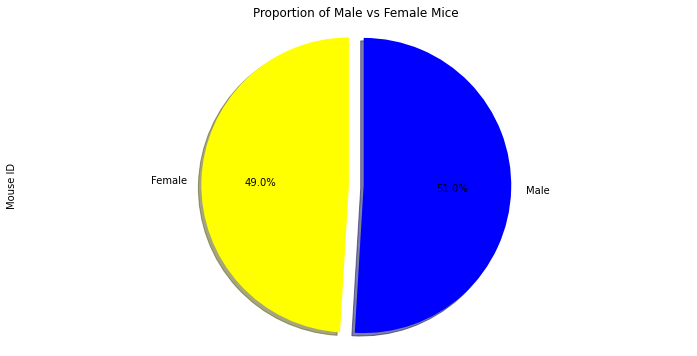

In [385]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fig = plt.figure(figsize=(12,6))
df2.groupby('Sex')['Mouse ID'].size().plot(kind='pie', startangle=90, shadow=True, labels=['Female','Male'], explode=(0.1,0), autopct="%.1f%%", colors=["yellow","blue"], title='Proportion of Male vs Female Mice')
fig = plt.figure
fig = plt.axis("equal")


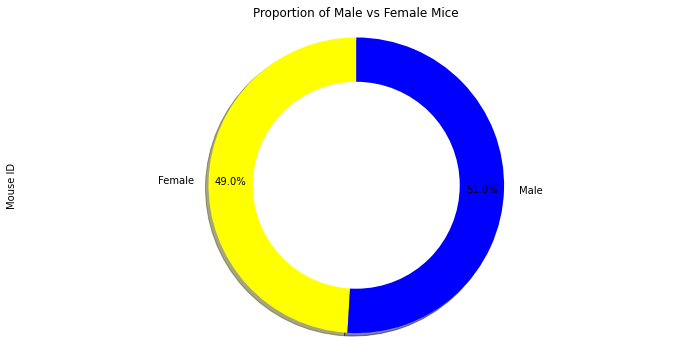

In [423]:
fig = plt.figure(figsize=(12,6))
df2.groupby('Sex')['Mouse ID'].size().plot(kind='pie', startangle=90, shadow=True, labels=['Female','Male'], autopct="%.1f%%", pctdistance=.85, colors=["yellow","blue"], title='Proportion of Male vs Female Mice')
fig = plt.figure
fig = plt.axis("equal")
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Displaying Chart
plt.show()

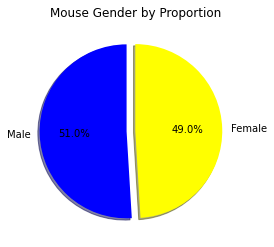

In [386]:
variable = df2.Sex.value_counts()
plt.pie(variable.values, explode=(0.1,0), labels=variable.index.values,autopct='%1.1f%%', shadow=True, startangle=90, colors=["blue","yellow"])
plt.title("Mouse Gender by Proportion")
#plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [387]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
kappa = df2['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
df4 = df2[kappa]
df4.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()

Drug Regimen
Capomulin    9355.420462
Ceftamin     9361.228582
Infubinol    9413.493529
Ramicane     9169.417875
Name: Tumor Volume (mm3), dtype: float64

In [388]:
df4.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [389]:
# Max timepoint for each mouse
psi = df4.groupby('Mouse ID').Timepoint.max().reset_index()
psi

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [390]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_sub1 = pd.merge(df1, psi, on=['Mouse ID', 'Timepoint'], how="inner")
df_sub1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


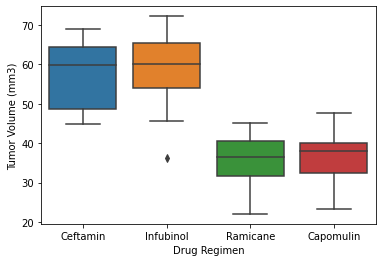

In [391]:
sns.boxplot(data=df_sub1, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

In [392]:
# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Infubinol", "Ramicane", "Ceftamin", "Capomulin"]
# Put treatments into a list for for loop (and later for plot labels)
data = []

for drug in drugs:
# Locate the rows which contain mice on each drug and get the tumor volumes
    sub = df_sub1.loc[df_sub1["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
  # Determine outliers using upper and lower bounds    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (df_sub1["Drug Regimen"] == drug) & ((df_sub1["Tumor Volume (mm3)"] > upper_bound) | (df_sub1["Tumor Volume (mm3)"] < lower_bound))
    outliers = df_sub1.loc[mask]
    print(outliers)
 # add subset    
    data.append(sub)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
4     c326          5           36.321346                 0    Infubinol   

      Sex  Age_months  Weight (g)  
4  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


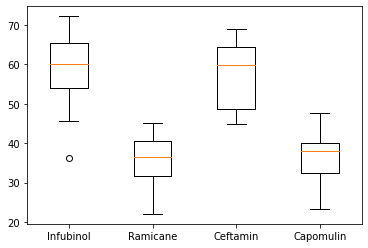

In [393]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(data, labels=drugs)
plt.show()

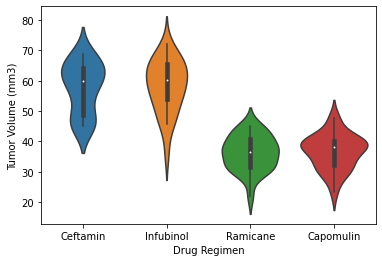

In [394]:
sns.violinplot(data=df_sub1, x='Drug Regimen', y='Tumor Volume (mm3)')
plt.show()

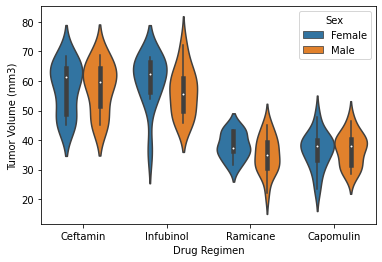

In [395]:
sns.violinplot(data=df_sub1, x='Drug Regimen', y='Tumor Volume (mm3)', hue='Sex')
plt.show()

In [396]:
capo_mice = df2.loc[df2["Drug Regimen"] == "Capomulin"]
capo_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
224,j246,0,45.0,0,Capomulin,Female,21,21
225,r554,0,45.0,0,Capomulin,Female,8,17
226,s185,0,45.0,0,Capomulin,Female,3,17
227,b742,0,45.0,0,Capomulin,Male,7,21


In [397]:
capo_mice = df2.loc[df2["Drug Regimen"] == "Capomulin"]
capo_mice.sample()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1699,i557,40,46.82107,1,Capomulin,Female,1,24


## Line and Scatter Plots

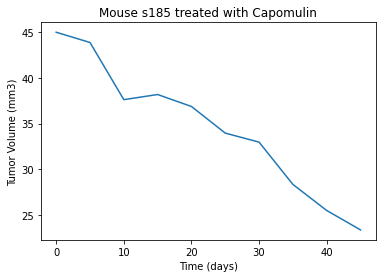

In [398]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = df2.loc[df2['Mouse ID'] == 's185']

plt.plot(mouse.Timepoint, mouse["Tumor Volume (mm3)"])
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 treated with Capomulin")

plt.show()

In [399]:
tumor_data = capo_mice.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean().reset_index()
tumor_data.head()

/var/folders/g8/dnbf824j671c2bqm2ld6k3b80000gn/T/ipykernel_48852/3465343371.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tumor_data = capo_mice.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean().reset_index()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344


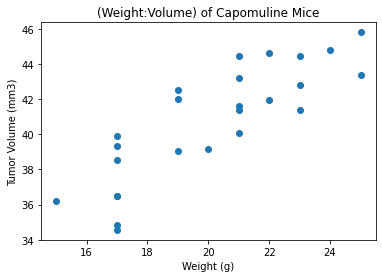

In [400]:
plt.scatter(tumor_data["Weight (g)"], tumor_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("(Weight:Volume) of Capomuline Mice")

plt.show()

In [401]:
tumor_data.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


## Correlation and Regression

The correlation between weight and average tumor volume in mice subject to the Capomulin Regimen is 0.84 yielding a r-squared value of 0.71.


/var/folders/g8/dnbf824j671c2bqm2ld6k3b80000gn/T/ipykernel_48852/1946271615.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tumor_data = capo_mice.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean().reset_index()


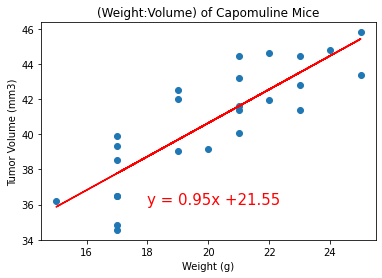

In [409]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_mice = df2.loc[df2["Drug Regimen"] == "Capomulin"]
tumor_data = capo_mice.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean().reset_index()
x = tumor_data['Weight (g)']
y = tumor_data['Tumor Volume (mm3)']
correlation = st.pearsonr(x, y)

print(f"""The correlation between weight and average tumor volume in mice subject to the Capomulin Regimen is {round(correlation[0],2)} yielding a r-squared value of {round(rvalue**2,2)}.""")

# Calcs for the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(tumor_data["Weight (g)"], tumor_data["Tumor Volume (mm3)"])
plt.plot(x,regress_values, "r-")

# display the linear regression equation
plt.annotate(line_eq,(18,36), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("(Weight:Volume) of Capomuline Mice")



plt.show()